# A little statistics

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats as stats
from scipy.stats import norm as norm
from scipy.stats import chi2 as chi2

### Converting a probability into a 'sigma'. As discussed in class, 'sigma' refers to a probability in physics. Our first task is to figure out how, given a probability, to calculate the assoicated 'sigma' value. The sigma implicitly refers to the standard normal distribution (a Gaussian with mean zero and standard deviation of 1). As we discussed in class, integrals of the standard normal distribution give probabilities.

In [89]:
#Normal distribution with sigma 0.7
f = norm.cdf(0.7, loc = 0, scale = 1)
print("Probability: ", f)
print("Associated Sigma: ", norm.ppf(f))

#Normal distribution with sigma 0.06
f = norm.cdf(0.5, loc = 0, scale = 8)
print("Probability: ", f)
print("Associated Sigma: ", norm.ppf(f))

Probability:  0.758036347776927
Associated Sigma:  0.7
Probability:  0.5249176690292472
Associated Sigma:  0.06249999999999993


#### If a minus sign appears, think about it and explain the meaning.
A negative value means that the point is located on the other side of the mean (which is centered at zero).

#### Now let's explore some other continuous analytic distributions. Following the pattern from your first HW assigment, make both the analytic pdf() and a realization with ~100k samples using a built-in distribution; but this time don't use the Gaussian. Choose one of the following distributions: Rayleigh; Lognormal; Chi-Squared or Gamma; Exponential. You and your partner should choose different distributions.

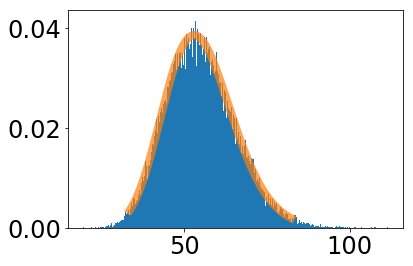

In [4]:
#Chi-Squared distribution as an analytic PDF and realization with 100k sample size

fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 24)
df = 55
x = np.linspace(chi2.ppf(0.01, df),chi2.ppf(0.99, df), 1000)
r = chi2.rvs(df, size=100000)
ax.hist(r,1000, density=True)
ax.plot(x, chi2.pdf(x, df), linewidth=8, alpha=0.7)
plt.show()

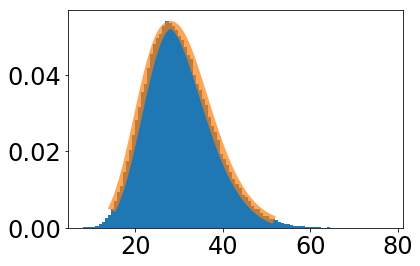

In [3]:
#Chi-Squared distribution as an analytic PDF and realization with 100k sample size

fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 24)
df = 30
x = np.linspace(chi2.ppf(0.01, df),chi2.ppf(0.99, df), 100)
r = chi2.rvs(df, size=100000)
ax.hist(r,100, density=True)
ax.plot(x, chi2.pdf(x, df), linewidth=8, alpha=0.7)
plt.show()

Chi squared distributions are commonly used for describing confidence intervals or testing hypotheses, and are relatively similar to normal distributions in appearance. A key factor in distinguishing Chi squared distributions is the dip of the "tails", and the continuity of the distribution, as well as the distribution's locus.

#### Imagine that your signal-free data follows the distribution you have chosen; and you have a measurement for which you need to determine the 'sigma'. Select a value for your hypothetical measurement.

In [5]:
#Select a value for your hypothetical measurement
#Our hypothetical target value here is 50
f = chi2.cdf(50, df)
#Clearly state the statistical question you want to ask in words
print("What is the probability that the background produced a signal as signal-like or more than what I observed?")
#Use the math to calculate the probability that the background produced the signal (Hint: you will want to use the statistics functions to do the integrals. .cdf() and .ppf() in scipy).
print("Probability: ", f)
#Convert your probability into an equivalent 'sigma'
print("Sigma from given probability: ", stats.norm.ppf(f))

What is the probability that the background produced a signal as signal-like or more than what I observed?
Probability:  0.9875979392810995
Sigma from given probability:  2.2444397490639574


Convert your word question into a mathematical integral:
$ P(x=50) = \int_{50}^\infty pdf(x)dx $ where $pdf(x)$ is the chi-squared distribution

#### Now explore a little bit. Try various hypothetical measurement values and see how the probabilities and 'sigmas' change. Discuss the patterns that you see.

As the hypothetical values deviate further from the center of the distribution, the probabilty that they're random noise instead of the target signal increases. This means that as the sigma of our value deviates further from zero, it's more likely that the percieved signal is from the background, rather than our intended measurement.

# Non-continuous distributions: Binomial

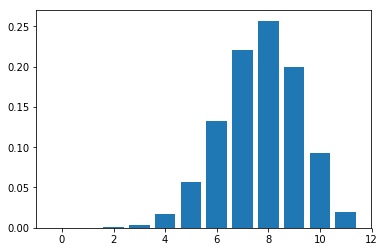

In [48]:
n = 11
p = 0.7

values = list(range(n + 1)) #generating values
dist = [scipy.stats.binom.pmf(x, n, p) for x in values] #applying binomial distribution to list

plt.bar(values, dist)
plt.show()

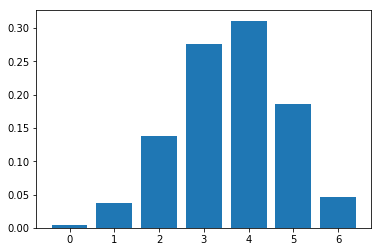

In [75]:
n = 6
p = 0.6

values = list(range(n + 1)) #generating values
dist = [scipy.stats.binom.pmf(x, n, p) for x in values] #applying binomial distribution to list

plt.bar(values, dist)
plt.show()

The binom function takes n and p values, where n is the number of samples, and p is the probability of success. The biniomial distribution demonstrates the frequency of success with a single n, where a sort of bell curve style is observed. The first plot demonstrates this concept using n=11, with the locus about 8, the second demonstrates this concept with n=6 and the generated locus about 4.

What is the probability that the background produced a signal as signal-like or more than what I observed?

In [83]:
n = 6
p = 0.6

prob = stats.binom.cdf(1, n, p)
print("Probability that the observed phenomenon is background noise: ", 1 - prob)

print("Sigma: ", stats.binom.ppf(prob, n, p))

Probability that the observed phenomenon is background noise:  0.95904
Sigma:  1.0


#### Because the distributions are discrete, so are the probabilities and 'sigmas'. Think about this and discuss the implications for experiments.

The discrete sigmas indicate that events are discrete. So the probability of one event occurring is not dependent on another event occuring.

#### While the results are discrete, the parameters of the distributions are not. For example, the mean of a Poisson distribution can be 9.2. Think about and explain why this makes sense and what changes continuously and what doesn't.

This makes sense because while the actual results themselves are discrete, their means may not be. This means that statistical averages such as the mean are continuous, however independent probabilities and events are not.